## Import Data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline  

## Read Data

In [13]:
df = pd.read_csv("train2.csv")
test = pd.read_csv("test1.csv")

## Preprocessing

In [14]:
#drop id from test data
id=test['ID']
test=test.drop(['ID'],axis=1)
df=df.drop(['ID'],axis=1)

In [15]:
#check for nulls 
df.isnull().sum()

Gender               0
Ever_Married       121
Age                  0
Graduated           69
Profession         105
Work_Experience    725
Spending_Score       0
Family_Size        301
Var_1               64
Segmentation         0
dtype: int64

In [16]:
#replace null values
df["Ever_Married"].fillna("No",inplace=True)
df["Graduated"].fillna("No", inplace=True)
df['Profession'].fillna(df['Profession'].mode(), inplace=True)
df["Family_Size"].fillna(df["Family_Size"].mean(), inplace=True)
df['Var_1'].fillna(df['Var_1'].mode(), inplace=True)
df["Work_Experience"].fillna(np.round(df["Work_Experience"].mean()),inplace=True)

In [17]:
test["Ever_Married"].fillna("No",inplace=True)
test["Graduated"].fillna("No", inplace=True)
test['Profession'].fillna(df['Profession'].mode(), inplace=True)
test["Family_Size"].fillna(df["Family_Size"].mean(), inplace=True)
test['Var_1'].fillna(df['Var_1'].mode(), inplace=True)
test["Work_Experience"].fillna(np.round(test["Work_Experience"].mean()),inplace=True)


## Label Encoder

In [18]:
labelencoder=LabelEncoder()
df['Spending_Score'] = labelencoder.fit_transform(df['Spending_Score'])
df['Profession']=labelencoder.fit_transform(df['Profession'])
df['Var_1']=labelencoder.fit_transform(df['Var_1'])
df['Segmentation']=labelencoder.fit_transform(df['Segmentation'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Ever_Married'] = labelencoder.fit_transform(df['Ever_Married'])
df['Graduated'] = labelencoder.fit_transform(df['Graduated'])

In [19]:
test['Spending_Score'] = labelencoder.fit_transform(test['Spending_Score'])
test['Profession']=labelencoder.fit_transform(test['Profession'])
test['Var_1']=labelencoder.fit_transform(test['Var_1'])
test['Gender'] = labelencoder.fit_transform(test['Gender'])
test['Ever_Married'] = labelencoder.fit_transform(test['Ever_Married'])
test['Graduated'] = labelencoder.fit_transform(test['Graduated'])


In [20]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,33,0,2,0.0,0,2.0,5,1
1,0,0,42,1,1,5.0,2,1.0,5,1
2,1,1,80,0,4,0.0,1,2.0,5,0
3,0,1,66,1,0,0.0,0,3.0,5,2
4,0,1,39,1,5,8.0,1,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...
7160,1,1,42,1,0,0.0,0,5.0,5,2
7161,1,1,48,1,0,0.0,0,2.0,5,2
7162,0,1,51,1,0,8.0,0,2.0,5,2
7163,0,1,25,0,2,2.0,2,2.0,5,0


## Polynomial Features

C:\Users\oem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

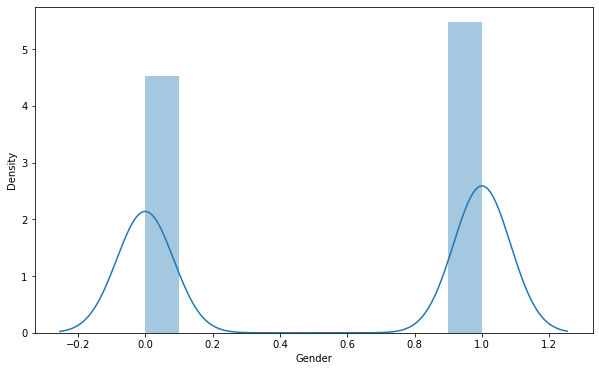

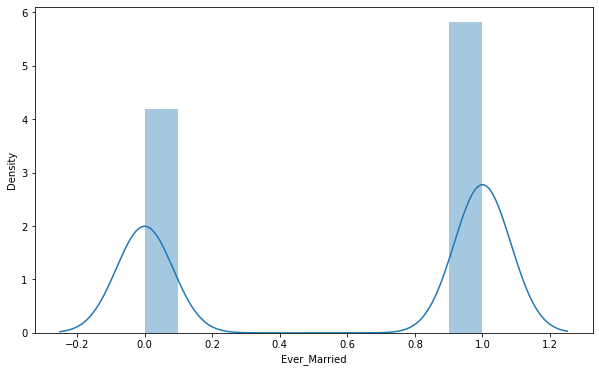

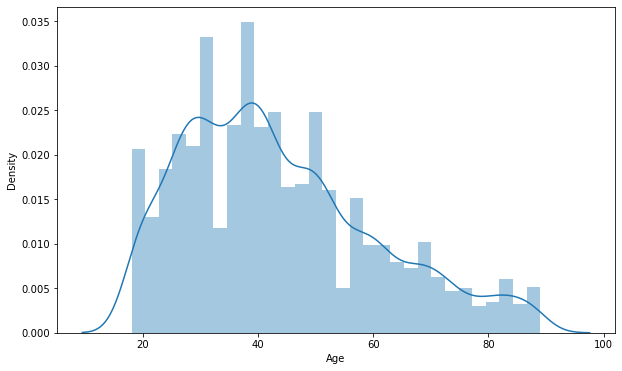

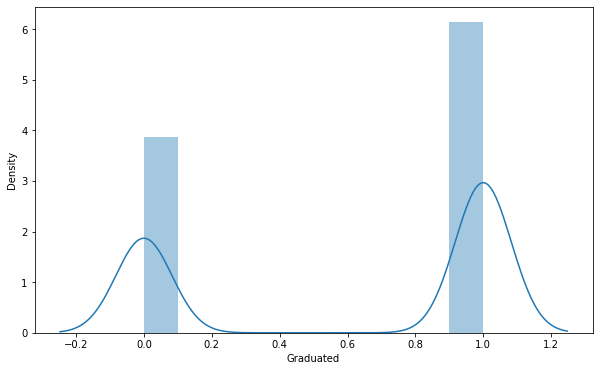

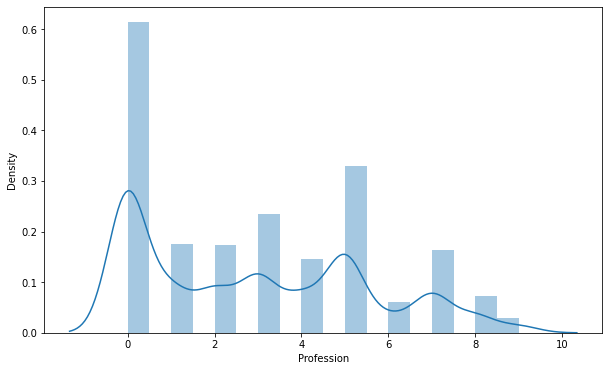

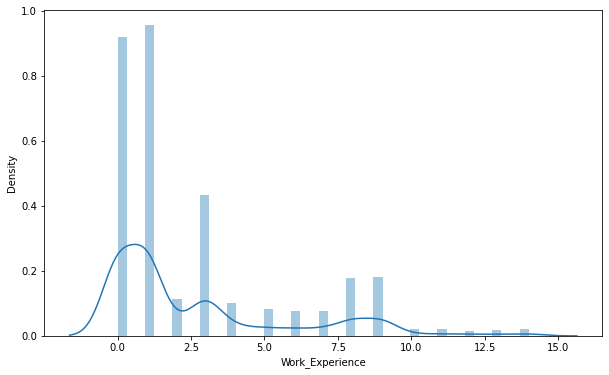

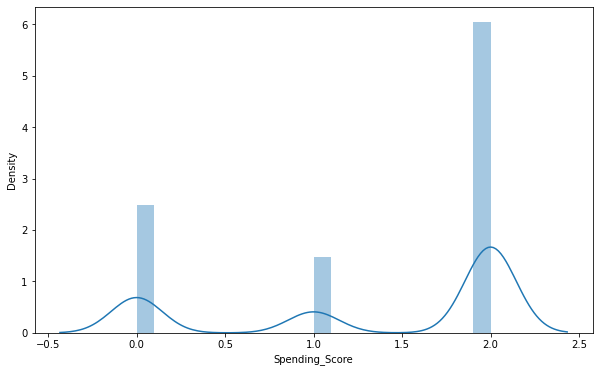

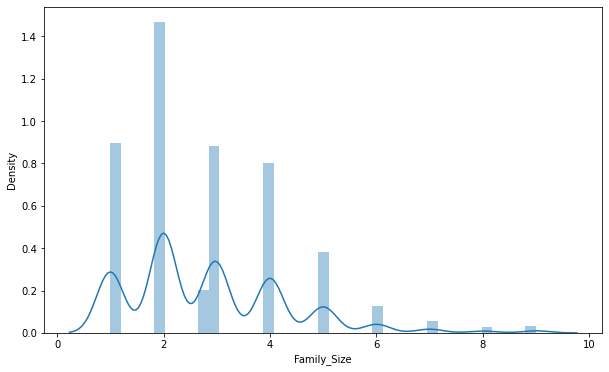

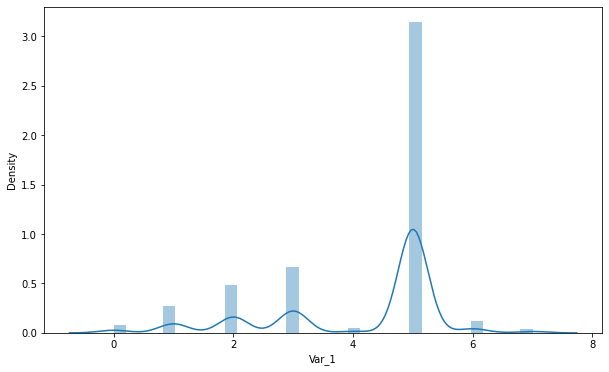

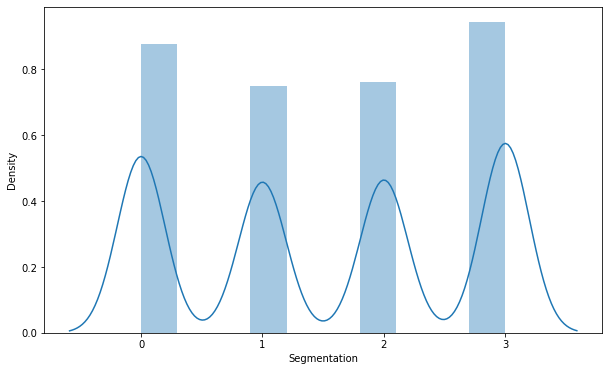

In [21]:
for col in df:
    plt.figure(figsize=(10,6))
    sns.distplot(x=df[col])
    plt.xlabel(col)
plt.show()

## Standard Scalar

In [22]:

nor=['Age']
df_norm = df.copy()
for i in nor :
    df_norm[i] = StandardScaler().fit_transform(np.array(df_norm[i]).reshape(-1,1))
    test[i]=StandardScaler().fit_transform(np.array(test[i]).reshape(-1,1))
df=df_norm.copy()



## MinMaxScalar

In [23]:
categorical_features = [ 'Profession', 'Work_Experience','Spending_Score', 'Var_1','Family_Size']

df_norm = df.copy()
for i in categorical_features :
    df_norm[i] = MinMaxScaler().fit_transform(np.array(df_norm[i]).reshape(-1,1))
    test[i]= MinMaxScaler().fit_transform(np.array(test[i]).reshape(-1,1))
df=df_norm.copy()


In [24]:
target = df['Segmentation']
x=df.drop(['Segmentation'],axis=1)

## Heat Map

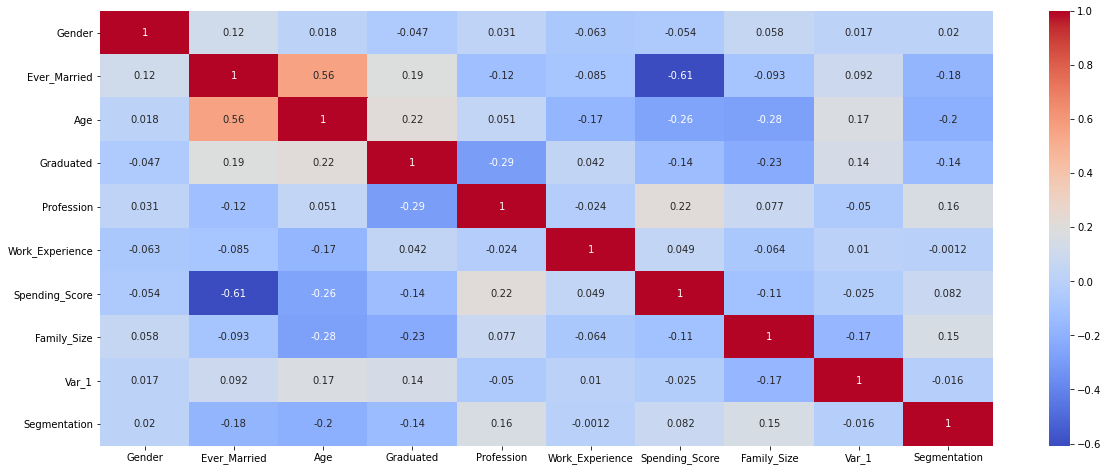

In [25]:
plt.figure(figsize=(20,8))
dataplot = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [26]:
from numpy import asarray
'''
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray(x)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
target.shape
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\n# define the dataset\ndata = asarray(x)\n# perform a polynomial features transform of the dataset\ntrans = PolynomialFeatures(degree=2)\ndata = trans.fit_transform(data)\ntarget.shape\n'

In [27]:
'''
data2 = asarray(test)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data2 = trans.fit_transform(data2)
print(data2)
'''

'\ndata2 = asarray(test)\n# perform a polynomial features transform of the dataset\ntrans = PolynomialFeatures(degree=2)\ndata2 = trans.fit_transform(data2)\nprint(data2)\n'

In [28]:
'''
pca = PCA(0.9)
pca.fit(x)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_
'''

"\npca = PCA(0.9)\npca.fit(x)\nPCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,\n  svd_solver='auto', tol=0.0, whiten=False)\npca.n_components_\n"

## Split Dataset to train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.20, random_state=0, stratify=target)

## Cross Validation sit

In [15]:
scores = cross_val_score(svm.SVC(), X_train, y_train, cv=5)
scores

array([0.42720139, 0.47428073, 0.44415358, 0.47469459, 0.46335079])

## Bagging

In [35]:
bag_model = BaggingClassifier(
base_estimator=svm.SVC(), 
n_estimators=50, 
max_samples=0.8, 
)

In [36]:
bag_model.fit(X_train, y_train)
print(bag_model.score(X_train, y_train)*100)
print(bag_model.score(X_test, y_test)*100)

52.98325191905094
48.56943475226797


In [43]:
y_pred_train=bag_model.predict(X_train)
y_pred_test=bag_model.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

1.7643056524773204
1.8080949057920446


In [23]:
y_pred = bag_model.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[178,  70,  47,  82],
       [ 96,  83,  89,  55],
       [ 50,  64, 160,  53],
       [ 86,  32,  19, 269]], dtype=int64)

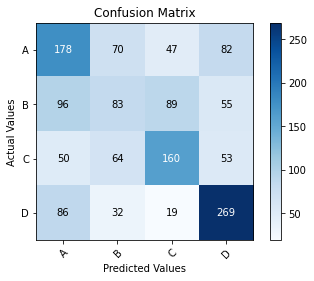

In [24]:
class_names = ['A','B','C','D']

fig, ax = plot_confusion_matrix(conf_mat=cm1,colorbar=True,class_names=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
submission = pd.DataFrame(bag_model.predict(test))
submission.columns = ['Segmentation']
submission['ID'] = id
submission = submission[['ID', 'Segmentation']]
submission['Segmentation'] = submission['Segmentation'].map({0:'A', 1:'B', 2:'C', 3:'D'})
submission.head()

,ID,Segmentation
0,755,A
1,4670,D
2,287,A
3,1142,D
4,6583,D


In [26]:
submission['Segmentation'].value_counts()

D    1125
A    1047
C     809
B     549
Name: Segmentation, dtype: int64

In [27]:
submission.to_csv("segmentation2.csv",index=False)

## PCA

In [28]:
pca = PCA(0.9)

In [29]:
pca.fit(x)

PCA(n_components=0.9)

In [30]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [31]:
pca.n_components_

5

In [32]:
'''
pca = PCA(n_components = 5)
pca.fit(x)
x_pca = pca.transform(x)
train1=pd.DataFrame(x_pca)
'''

In [33]:
'''
pca2 = PCA(n_components = 5)
pca2.fit(test)
x_pca2 = pca2.transform(test)
  
x_pca2.shape
test1=pd.DataFrame(x_pca2)
'''

## CatBoost Classifier

In [30]:
model = CatBoostClassifier(iterations=1000,verbose=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)*100

73.63921842288904

In [42]:
print(model.score(X_train, y_train)*100)
print(model.score(X_test, y_test)*100)

73.63921842288904
45.08025122121423


In [44]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

0.8965457083042568
1.9623168178646198


In [21]:
#model1 = CatBoostClassifier(iterations=1199)
#model1.fit(x, target)
#model1.score(x, target)*100

In [22]:
#print(cross_val_score(model1, x, target, cv=3))# force scores to be positive

In [39]:
submission = pd.DataFrame(model.predict(test1))
submission.columns = ['Segmentation']
submission['ID'] = id
submission = submission[['ID', 'Segmentation']]
submission['Segmentation'] = submission['Segmentation'].map({0:'A', 1:'B', 2:'C', 3:'D'})
submission.head(10)

,ID,Segmentation
0,755,A
1,4670,D
2,287,A
3,1142,D
4,6583,A
5,2635,B
6,5182,A
7,2850,D
8,6723,C
9,8290,C


In [40]:
submission['Segmentation'].value_counts()

D    1284
A     946
C     876
B     424
Name: Segmentation, dtype: int64

In [41]:
submission.to_csv("segmentation2.csv",index=False)

## Random Forest Classifier

In [24]:
clf2 = RandomForestClassifier()
clf2.fit(x, target)

RandomForestClassifier()

In [25]:
print(clf2.score(X_train, y_train)*100)
print(clf2.score(X_test, y_test)*100)

94.90579204466155
95.25471039776691


In [26]:
y_pred_train=clf2.predict(X_train)
y_pred_test=clf2.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

0.1386950453593859
0.13049546406140963


In [46]:
y_pred = clf2.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred,labels=clf2.classes_)
cm3

array([[359,  11,   4,   3],
       [  6, 297,  15,   5],
       [  7,   4, 312,   4],
       [  3,   2,   7, 394]], dtype=int64)

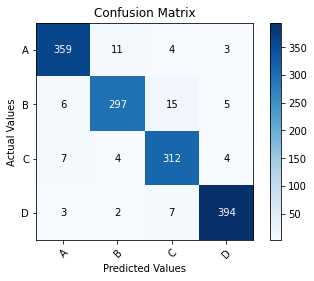

In [47]:
class_names = ['A','B','C','D']
plot_confusion_matrix(conf_mat=cm3,colorbar=True,class_names=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [48]:
submission = pd.DataFrame(clf2.predict(test))
submission.columns = ['Segmentation']
submission['ID'] = id
submission = submission[['ID', 'Segmentation']]
submission['Segmentation'] = submission['Segmentation'].map({0:'A', 1:'B', 2:'C', 3:'D'})
submission.head(20)

,ID,Segmentation
0,755,B
1,4670,D
2,287,A
3,1142,A
4,6583,C
5,2635,A
6,5182,C
7,2850,D
8,6723,C
9,8290,B


In [49]:
submission['Segmentation'].value_counts()

D    1083
A     965
C     802
B     680
Name: Segmentation, dtype: int64

In [50]:
submission.to_csv("segmentation2.csv",index=False)

## Grid Search

In [51]:
param_grid = {'kernel': ['rbf', 'poly', 'sigmoid']}

In [52]:
param_grid = {
              'kernel': ['rbf', 'poly', 'sigmoid']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................kernel=rbf;, score=0.463 total time=   1.2s
[CV 2/5] END ........................kernel=rbf;, score=0.456 total time=   2.5s
[CV 3/5] END ........................kernel=rbf;, score=0.466 total time=   1.8s
[CV 4/5] END ........................kernel=rbf;, score=0.467 total time=   1.2s
[CV 5/5] END ........................kernel=rbf;, score=0.462 total time=   2.4s
[CV 1/5] END .......................kernel=poly;, score=0.446 total time=   1.4s
[CV 2/5] END .......................kernel=poly;, score=0.459 total time=   0.8s
[CV 3/5] END .......................kernel=poly;, score=0.469 total time=   0.8s
[CV 4/5] END .......................kernel=poly;, score=0.458 total time=   1.9s
[CV 5/5] END .......................kernel=poly;, score=0.462 total time=   1.6s
[CV 1/5] END ....................kernel=sigmoid;, score=0.301 total time=   0.7s
[CV 2/5] END ....................kernel=sigmoid;,

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [53]:
grid.best_params_

{'kernel': 'rbf'}

## SVM

In [29]:
clf2 = svm.SVC(decision_function_shape='ovr',kernel= 'rbf',C=1200,gamma=0.1)
clf2.fit(X_train, y_train)

SVC(C=1200, gamma=0.1)

In [32]:
print(clf2.score(X_train, y_train)*100)
print(clf2.score(X_test, y_test)*100)

52.09351011863224
48.22051639916259


In [33]:
y_pred_train=clf2.predict(X_train)
y_pred_test=clf2.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

1.7821004884856944
1.7648290300069784


In [56]:
y_pred = clf.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred)
cm4

array([[169,  71,  51,  86],
       [ 92,  80,  95,  56],
       [ 49,  65, 162,  51],
       [ 87,  30,  22, 267]], dtype=int64)

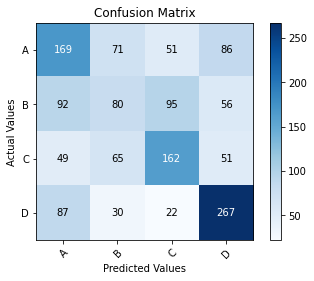

In [57]:
class_names = ['A','B','C','D']

fig, ax = plot_confusion_matrix(conf_mat=cm4,colorbar=True,class_names=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [58]:
submission = pd.DataFrame(clf.predict(test))
submission.columns = ['Segmentation']
submission['ID'] = id
submission = submission[['ID', 'Segmentation']]
submission['Segmentation'] = submission['Segmentation'].map({0:'A', 1:'B', 2:'C', 3:'D'})
submission.head(20)

,ID,Segmentation
0,755,A
1,4670,D
2,287,A
3,1142,D
4,6583,D
5,2635,B
6,5182,C
7,2850,D
8,6723,C
9,8290,B


In [59]:
submission['Segmentation'].value_counts()

D    1124
A    1024
C     823
B     559
Name: Segmentation, dtype: int64

In [60]:
submission.to_csv("segmentation2.csv",index=False)

In [46]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = xgboost.XGBClassifier()

In [47]:
clf = [dtc,rfc,knn,xgb]
for algo in clf:
    score = cross_val_score( algo,x,target,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.3627355198883461
The accuracy score of RandomForestClassifier() is: 0.41632937892533145
The accuracy score of KNeighborsClassifier() is: 0.41367759944173066
The accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) is: 0.4355896720167481


In [48]:
rfc = RandomForestClassifier()
xgb = xgboost.XGBClassifier()
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)
from sklearn.ensemble import StackingClassifier
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,x,target,cv = 5,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

The accuracy score of is: 0.44508025122121425


In [49]:
stack_model.fit(x, target)   # training of stacked model


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=Non...
                                              interaction_constraints=None,
                                              learning_rate=

In [50]:
print(stack_model.score(X_train, y_train)*100)
print(stack_model.score(X_test, y_test)*100)

67.84717376133985
68.52756454989533


In [51]:
y_pred_train=stack_model.predict(X_train)
y_pred_test=stack_model.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

0.8299023028611305
0.7515701325889742


In [68]:
submission = pd.DataFrame(stack_model.predict(test))
submission.columns = ['Segmentation']
submission['ID'] = id
submission = submission[['ID', 'Segmentation']]
submission['Segmentation'] = submission['Segmentation'].map({0:'A', 1:'B', 2:'C', 3:'D'})
submission.head(20)

,ID,Segmentation
0,755,A
1,4670,D
2,287,A
3,1142,D
4,6583,A
5,2635,B
6,5182,B
7,2850,D
8,6723,A
9,8290,A


In [69]:
submission.to_csv("segmentation2.csv",index=False)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
y_pred_train=neigh.predict(X_train)
y_pred_test=neigh.predict(X_test)

print(neigh.score(X_train, y_train)*100)
print(neigh.score(X_test, y_test)*100)


59.473133286810885
41.939986043265876


In [53]:
y_pred_train=neigh.predict(X_train)
y_pred_test=neigh.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

1.4345778087927425
2.0565247732030705


In [56]:
log=LogisticRegression()
log.fit(X_train,y_train)
print(log.score(X_train, y_train)*100)
print(log.score(X_test, y_test)*100)


45.83042568039079
46.545708304256806


In [57]:
y_pred_train=log.predict(X_train)
y_pred_test=log.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

2.1017096999302165
1.9846475924633635


In [59]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_train, y_train)*100)
print(dt.score(X_test, y_test)*100)


95.56873691556176
38.032100488485696


In [60]:
y_pred_train=dt.predict(X_train)
y_pred_test=dt.predict(X_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

0.12718073970690857
2.1444521981856246
